**PROJECT 2 GROUP 65**

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#IMPORTING PACKAGES
!pip install ts2vg 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#CREATING FUCTIONS FOR CALCULATION PERMUTATION ENTROPY, ORDIANL PATTERNS,HASH AND COMPLEXITY
def s_entropy(freq_list): #ENTROPY FUNCTION This function computes the shannon entropy of a given frequency distribution.
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay): #ORDINAL PATTERN FUNCTION This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 
    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x): #hASH FUCNCTION
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op): # ENTROPY CALCULATION FUNCTION
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op): #COMPLEXITY FUNCTION This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

In [5]:
#MOUNTING DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#CHECKING AND CHANGING THE PATH TO THE DRIVE PATH WHERE THE DATASET IS STORED
%pwd
%cd /content/drive/MyDrive/Dataset

/content/drive/MyDrive/Dataset


# TASK 1


In [7]:
#SETTING ATRRIBUTES AND STORING THEM INTO THE VARIABLES
fp_init = '/content/drive/MyDrive/Dataset/' #PATH OF THE DATASET
activity = ['climbingdown', 'climbingup', 'walking', 'running'] #ACTIVITY IN THE DATASETS
attributes = ['attr_x', 'attr_y', 'attr_z'] #AXIS ALONG WHICH THE USER DATA IS COLLECTED
subjects = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15'] #Folder name in the Dataset folder
VG = ['NVG','HVG'] #GRAPHS LABEL NVG = NATURAL VISIBILITY GRAPH AND HVG = HORIZONTAL VISIBILITY GRAPH

In [8]:
#IMPORTING NATURAL VISIBILITY GRAPH METHOD FROM TS2VG LIBRARY
from ts2vg import NaturalVG
nvg = NaturalVG()

In [9]:
#IMPORTING HORIZONTAL VISIBILITY GRAPH METHOD FROM TS2VG LIBRARY
from ts2vg import HorizontalVG
hvg = HorizontalVG()

##BODY PART : CHEST

In [10]:
#CREATING AN OUTPUT FRAME FOR CHEST POSITION DATA
column_names = ['Method', 'Subject', 'Accelerometer axis', 'Average degree', 'Network diameter', 'Average path length', 'Activity']
Output_Frame = pd.DataFrame(columns=column_names)

In [11]:
for s in subjects: #FOR LOOP TO READ SUBJECTS 1-15
  for act in activity: #FOR LOOP TO READ ACTIVITIES, 4 DIFFERENT ACTIVITIES
    filepath = fp_init + s + '/acc_' + act + '_chest.csv' #READING THE DATAFILE OF CHEST PARTICULARLU FROM THE GIVEN PATH
    file = pd.read_csv(filepath) #STORING THAT TO VARIABLE FILE
    for vg in VG: #FOR LOOP TO READ GRAPHS
      for attr in attributes:  #FOR LOOP TO READ AXIS ALONG WHICH DATA IS COLLECTED    
        if vg == 'NVG': #BLOCK FOR NATURAL VISIBILITY GRAPH VALUE GENERATION
          nvg.build(file[attr][1000:2025]) #BLOCK TO TAKE VALUES FROM 1000 TO 2024
          ig_nvg = nvg.as_igraph()
          df_temp = {'Method':vg, 'Subject':s, 'Accelerometer axis':attr, 'Average degree':np.mean(ig_nvg.degree()), 'Network diameter':ig_nvg.diameter(), 'Average path length':ig_nvg.average_path_length(), 'Activity':act}
          Output_Frame = Output_Frame.append(df_temp, ignore_index=True)
        elif vg == 'HVG': #BLOCK FOR HORIZONTAL VISIBILITY GRAPH VALUE GENERATION
          hvg.build(file[attr][1000:2025]) #BLOCK TO TAKE VALUES FROM 1000 TO 2024
          ig_hvg = hvg.as_igraph()
          df_temp = {'Method':vg, 'Subject':s, 'Accelerometer axis':attr, 'Average degree':np.mean(ig_hvg.degree()), 'Network diameter':ig_hvg.diameter(), 'Average path length':ig_hvg.average_path_length(), 'Activity':act}
          Output_Frame = Output_Frame.append(df_temp, ignore_index=True)
Output_Frame #FINAL FRAME DISPLAY ACCORDING TO TEST CASE

,Method,Subject,Accelerometer axis,Average degree,Network diameter,Average path length,Activity
0,NVG,subject_1,attr_x,15.600000,16,6.607435,climbingdown
1,NVG,subject_1,attr_y,14.076098,11,4.267782,climbingdown
2,NVG,subject_1,attr_z,9.555122,9,4.428039,climbingdown
3,HVG,subject_1,attr_x,3.949268,32,14.520282,climbingdown
4,HVG,subject_1,attr_y,3.945366,28,12.526623,climbingdown
...,...,...,...,...,...,...,...
355,NVG,subject_15,attr_y,9.756098,169,57.121947,running
356,NVG,subject_15,attr_z,8.019512,9,4.649663,running
357,HVG,subject_15,attr_x,3.962927,21,8.682441,running
358,HVG,subject_15,attr_y,3.660488,171,59.541317,running


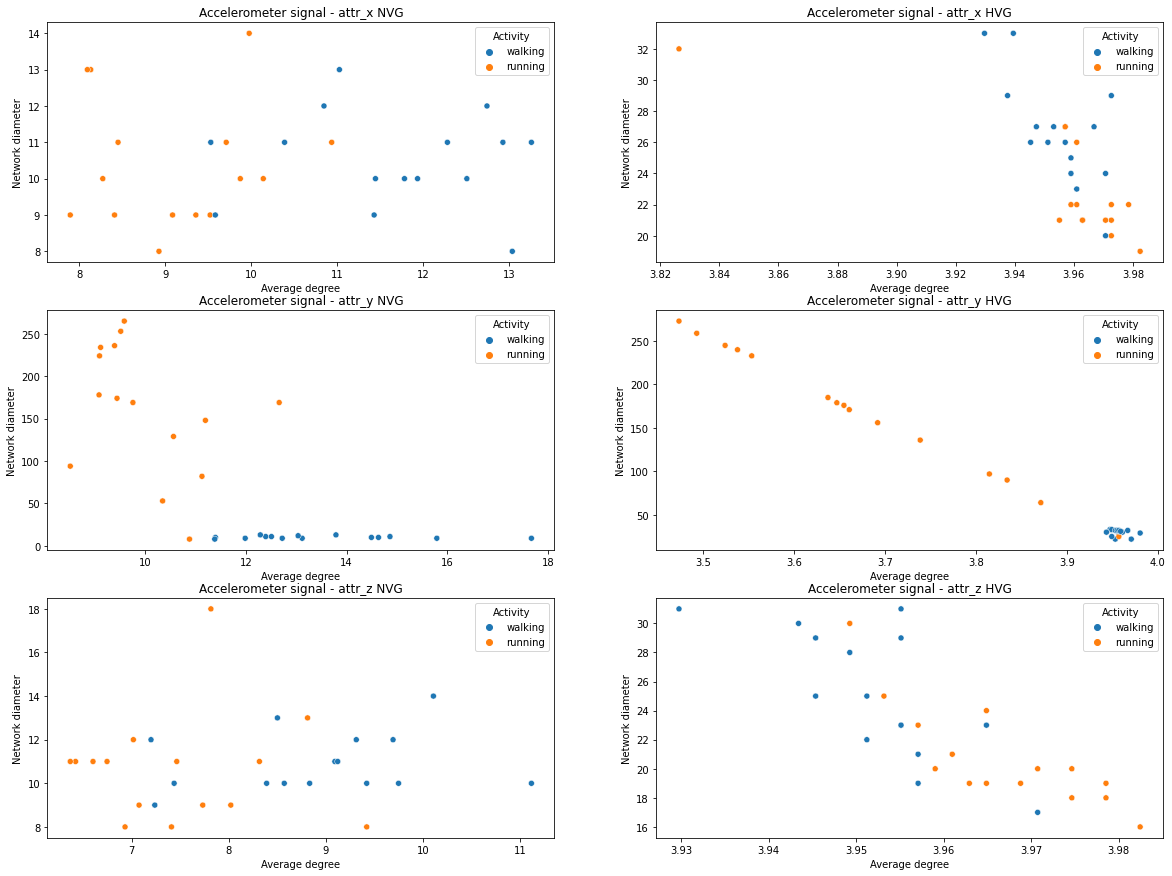

In [12]:
# BLOCK FOR PLOTTING GRAPS FOR WALKING AND RUNNING BASED ON AVERAGE DEGREE VS NETWORK DIAMETER
f, axes = plt.subplots(3,2, figsize=(20,15)) #SUBPLOT LINE
for attr in attributes: #FOR LOOP TO READ AXIS
  for m in ['NVG', 'HVG']: #FOR LOOP TO READ GRAPH TYPE
    temp_table = Output_Frame[(Output_Frame['Accelerometer axis'] == attr) & (Output_Frame['Method'] == m) & (Output_Frame['Activity'].isin(['walking','running']))]
    plot_title = 'Accelerometer signal - ' + str(attr) + ' '+ m
    if m == 'NVG': #FOR NATURAL VISIBILTY GRAPH
      sns.scatterplot(data = temp_table, x = 'Average degree', y = 'Network diameter', hue = temp_table['Activity'], ax = axes[attributes.index(attr), 0]).set(title=plot_title)
    else: #FOR HORIZONTAL VISIBILTY GRAPH
      sns.scatterplot(data = temp_table, x = 'Average degree', y = 'Network diameter', hue = temp_table['Activity'], ax = axes[attributes.index(attr), 1]).set(title=plot_title)
plt.show() #SCATTERPLOT OUTPUT

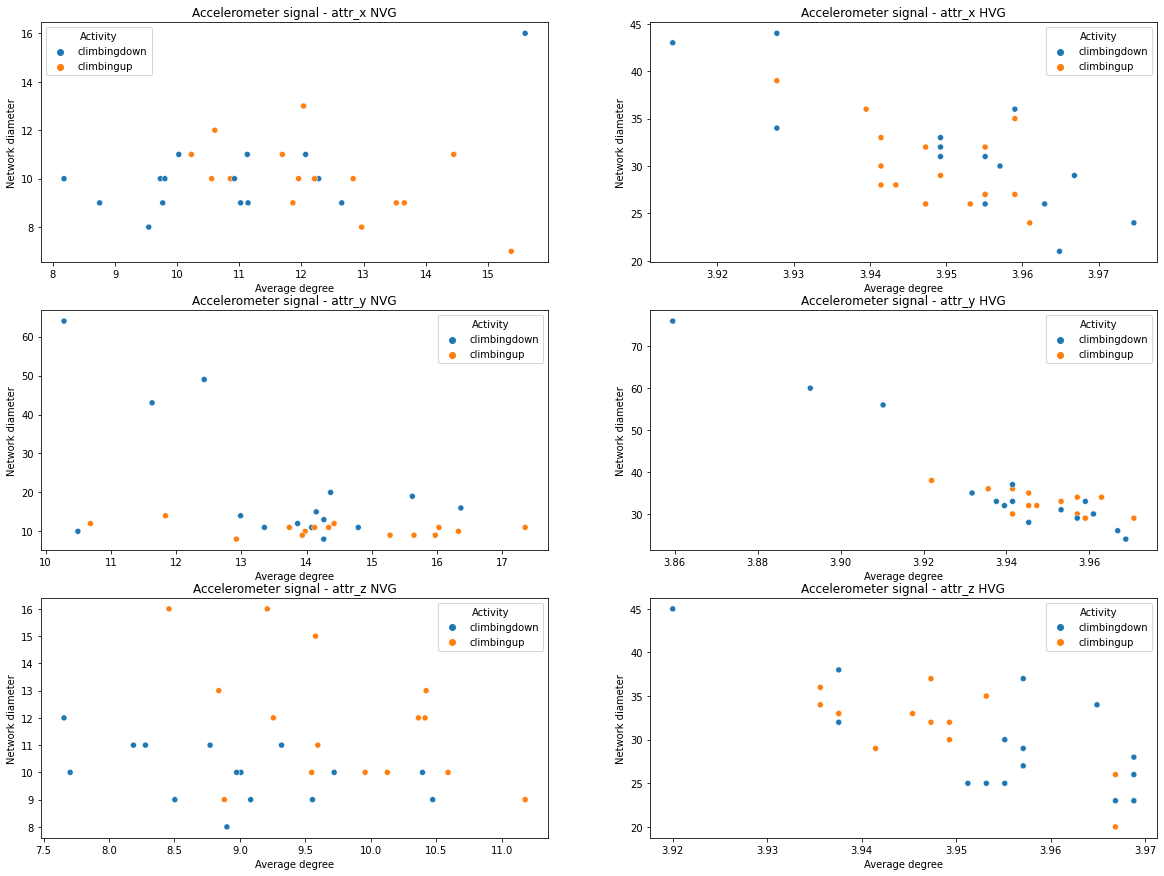

In [13]:
# BLOCK FOR PLOTTING GRAPS FOR CLIMBINGUP AND CLIMBINGDOWN BASED ON AVERAGE DEGREE VS NETWORK DIAMETER
f, axes = plt.subplots(3,2, figsize=(20,15)) #SUBPLOT LINE
for attr in attributes: #FOR LOOP TO READ AXIS
  for m in ['NVG', 'HVG']: #FOR LOOP TO READ GRAPH TYPE
    temp_table = Output_Frame[(Output_Frame['Accelerometer axis'] == attr) & (Output_Frame['Method'] == m) & (Output_Frame['Activity'].isin(['climbingdown','climbingup']))]
    plot_title = 'Accelerometer signal - ' + str(attr) + ' '+ m
    if m == 'NVG': #FOR NATURAL VISIBILTY GRAPH
      sns.scatterplot(data = temp_table, x = 'Average degree', y = 'Network diameter', hue = temp_table['Activity'], ax = axes[attributes.index(attr), 0]).set(title=plot_title)
    else:
      sns.scatterplot(data = temp_table, x = 'Average degree', y = 'Network diameter', hue = temp_table['Activity'], ax = axes[attributes.index(attr), 1]).set(title=plot_title)
plt.show() #SCATTER PLOT

## BODY PART : HEAD

In [14]:
#CREATING AN OUTPUT FRAME FOR HEAD POSITION DATA
column_names = ['Method', 'Subject', 'Accelerometer axis', 'Average degree', 'Network diameter', 'Average path length', 'Activity']
Output_Frameh1 = pd.DataFrame(columns=column_names)

In [15]:
for s in subjects: #FOR LOOP TO READ SUBJECTS 1-15
  for act in activity: #FOR LOOP TO READ ACTIVITIES, 4 DIFFERENT ACTIVITIES
    filepath = fp_init + s + '/acc_' + act + '_head.csv' #READING THE DATAFILE OF HEAD PARTICULARLY FROM THE GIVEN PATH
    file = pd.read_csv(filepath) #STORING THAT TO VARIABLE FILE
    for vg in VG: #FOR LOOP TO READ GRAPHS
      for attr in attributes:  #FOR LOOP TO READ AXIS ALONG WHICH DATA IS COLLECTED    
        if vg == 'NVG': #BLOCK FOR NATURAL VISIBILITY GRAPH VALUE GENERATION
          nvg.build(file[attr][1000:2025]) #BLOCK TO TAKE VALUES FROM 1000 TO 2024
          ig_nvg = nvg.as_igraph()
          df_temp = {'Method':vg, 'Subject':s, 'Accelerometer axis':attr, 'Average degree':np.mean(ig_nvg.degree()), 'Network diameter':ig_nvg.diameter(), 'Average path length':ig_nvg.average_path_length(), 'Activity':act}
          Output_Frameh1 = Output_Frameh1.append(df_temp, ignore_index=True)
        elif vg == 'HVG': #BLOCK FOR HORIZONTAL VISIBILITY GRAPH VALUE GENERATION
          hvg.build(file[attr][1000:2025]) #BLOCK TO TAKE VALUES FROM 1000 TO 2024
          ig_hvg = hvg.as_igraph()
          df_temp = {'Method':vg, 'Subject':s, 'Accelerometer axis':attr, 'Average degree':np.mean(ig_hvg.degree()), 'Network diameter':ig_hvg.diameter(), 'Average path length':ig_hvg.average_path_length(), 'Activity':act}
          Output_Frameh1 = Output_Frameh1.append(df_temp, ignore_index=True)
Output_Frameh1 #FINAL FRAME DISPLAY ACCORDING TO TEST CASE

,Method,Subject,Accelerometer axis,Average degree,Network diameter,Average path length,Activity
0,NVG,subject_1,attr_x,10.011707,13,5.313331,climbingdown
1,NVG,subject_1,attr_y,13.818537,10,4.725469,climbingdown
2,NVG,subject_1,attr_z,12.645854,10,4.607670,climbingdown
3,HVG,subject_1,attr_x,3.921951,39,13.323354,climbingdown
4,HVG,subject_1,attr_y,3.947317,26,10.878880,climbingdown
...,...,...,...,...,...,...,...
355,NVG,subject_15,attr_y,8.335610,11,5.193813,running
356,NVG,subject_15,attr_z,8.454634,10,4.787971,running
357,HVG,subject_15,attr_x,3.964878,18,7.631580,running
358,HVG,subject_15,attr_y,3.951220,23,8.284708,running


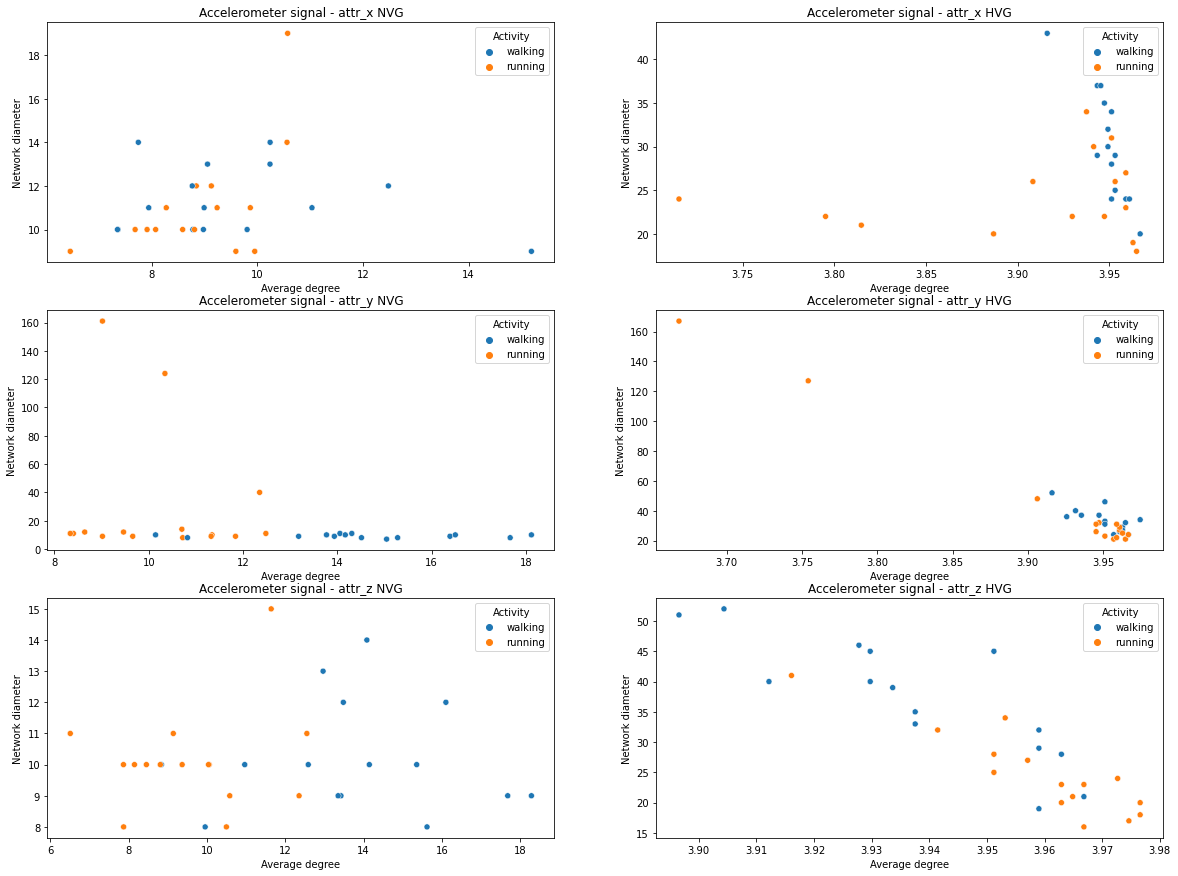

In [16]:
# BLOCK FOR PLOTTING GRAPS FOR WALKING AND RUNNING BASED ON AVERAGE DEGREE VS NETWORK DIAMETER
f, axes = plt.subplots(3,2, figsize=(20,15)) #SUBPLOT LINE
for attr in attributes: #FOR LOOP TO READ AXIS
  for m in ['NVG', 'HVG']: #FOR LOOP TO READ GRAPH TYPE
    temp_table = Output_Frameh1[(Output_Frameh1['Accelerometer axis'] == attr) & (Output_Frameh1['Method'] == m) & (Output_Frameh1['Activity'].isin(['walking','running']))]
    plot_title = 'Accelerometer signal - ' + str(attr) + ' '+ m
    if m == 'NVG': #FOR NATURAL VISIBILTY GRAPH
      sns.scatterplot(data = temp_table, x = 'Average degree', y = 'Network diameter', hue = temp_table['Activity'], ax = axes[attributes.index(attr), 0]).set(title=plot_title)
    else: #FOR HORIZONTAL VISIBILTY GRAPH
      sns.scatterplot(data = temp_table, x = 'Average degree', y = 'Network diameter', hue = temp_table['Activity'], ax = axes[attributes.index(attr), 1]).set(title=plot_title)
plt.show() #SCATTERPLOT OUTPUT

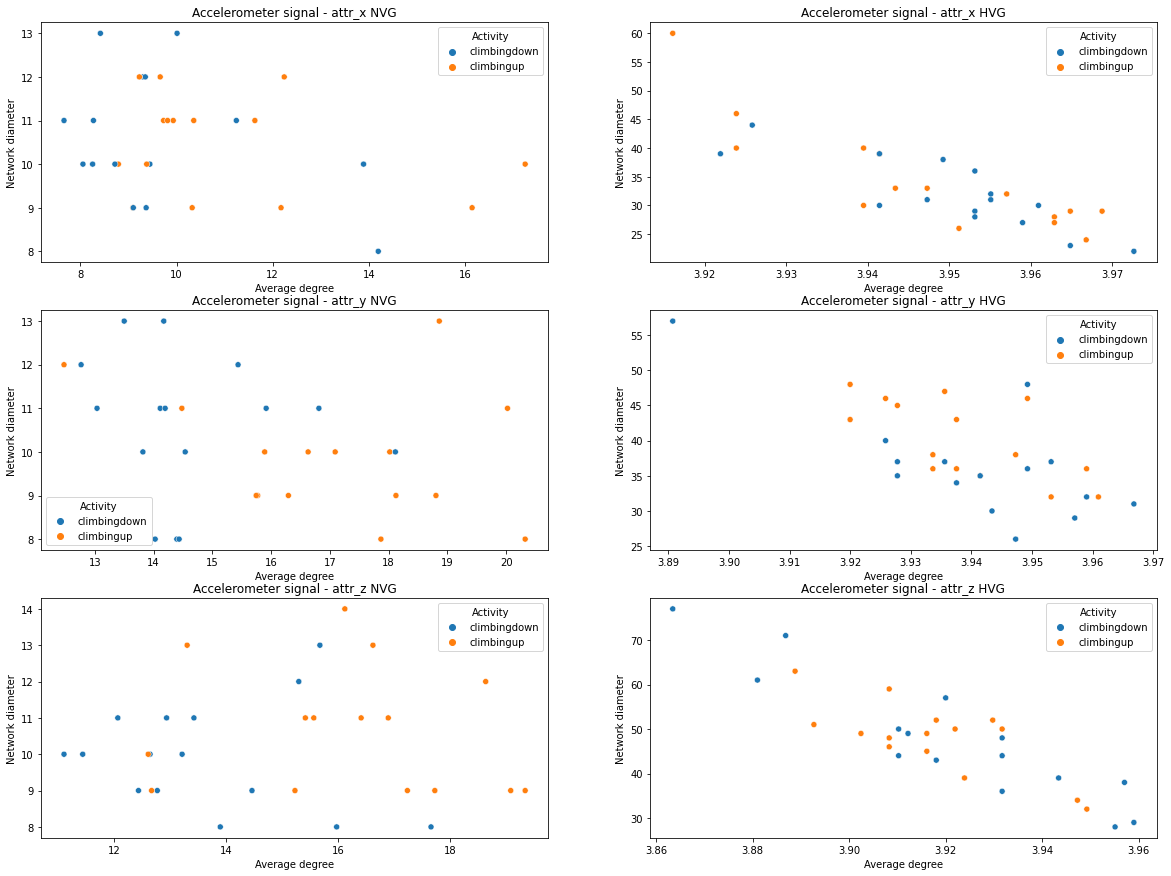

In [17]:
# BLOCK FOR PLOTTING GRAPS FOR CLIMBINGUP AND CLIMBINGDOWN BASED ON AVERAGE DEGREE VS NETWORK DIAMETER
f, axes = plt.subplots(3,2, figsize=(20,15)) #SUBPLOT LINE
for attr in attributes: #FOR LOOP TO READ AXIS
  for m in ['NVG', 'HVG']: #FOR LOOP TO READ GRAPH TYPE
    temp_table = Output_Frameh1[(Output_Frameh1['Accelerometer axis'] == attr) & (Output_Frameh1['Method'] == m) & (Output_Frameh1['Activity'].isin(['climbingdown','climbingup']))]
    plot_title = 'Accelerometer signal - ' + str(attr) + ' '+ m
    if m == 'NVG': #FOR NATURAL VISIBILTY GRAPH
      sns.scatterplot(data = temp_table, x = 'Average degree', y = 'Network diameter', hue = temp_table['Activity'], ax = axes[attributes.index(attr), 0]).set(title=plot_title)
    else: #FOR HORIZONTAL VISIBILITY GRAPH
      sns.scatterplot(data = temp_table, x = 'Average degree', y = 'Network diameter', hue = temp_table['Activity'], ax = axes[attributes.index(attr), 1]).set(title=plot_title)
plt.show() #SCATTERPLOT DISPLAY

# TASK 2


## BODY PART : CHEST

In [18]:
#CREATING AN OUTPUT FRAME FOR CHEST POSITION DATA
column_names = ['Subject', 'Accelerometer axis', 'Signal length', 'Dimension' , 'Delay' ,'Permutation entropy' , 'Complexity',  'Activity']
Output_Frame2 = pd.DataFrame(columns = column_names)

In [19]:
for s in subjects:#FOR LOOP TO READ SUBJECTS 1-15
  for act in activity: #FOR LOOP TO READ ACTIVITIES, 4 DIFFERENT ACTIVITIES
    filepath = fp_init + s + '/acc_' + act + '_chest.csv' #READING THE DATAFILE OF CHEST PARTICULARLY FROM THE GIVEN PATH
    file = pd.read_csv(filepath) #STORING IT TO FILE VARIABLE
    for signal_length in [1024, 2048, 4096]: #FOR LOOP TO READ SIGNAL LENGTH VALUES 
      for dimension in [3, 4, 5, 6]: #FOR LOOP TO READ EMBEDED DIMENSIONS VALUE
        for delay in [1, 2, 3]: #FOR LOOP TO READ EMBEDED DELAY
          for attr in attributes: #FOR LOOP TO RAD AXIS
            op_result = ordinal_patterns(file[attr][0:signal_length], dimension, delay)
            perm_ent = p_entropy(op_result) #CALCULATING ENTROPY
            comp= complexity(op_result) #CALCULATING COMPLEXITY
            df_temp2 = {'Subject':s, 'Accelerometer axis':attr, 'Signal length': signal_length, 'Dimension': dimension,'Delay': delay, 'Permutation entropy':perm_ent, 'Complexity': comp, 'Activity':act}
            Output_Frame2 = Output_Frame2.append(df_temp2, ignore_index = True) #STORING THE VALUE TO OUPUT FRAME
Output_Frame2 #FINAL FRAME DISPLAY ACCORDING TO TEST CASE

,Subject,Accelerometer axis,Signal length,Dimension,Delay,Permutation entropy,Complexity,Activity
0,subject_1,attr_x,1024,3,1,0.863880,0.113789,climbingdown
1,subject_1,attr_y,1024,3,1,0.871156,0.109263,climbingdown
2,subject_1,attr_z,1024,3,1,0.866439,0.112078,climbingdown
3,subject_1,attr_x,1024,3,2,0.960872,0.036053,climbingdown
4,subject_1,attr_y,1024,3,2,0.961124,0.035987,climbingdown
...,...,...,...,...,...,...,...,...
6475,subject_15,attr_y,4096,6,2,0.728875,0.335466,running
6476,subject_15,attr_z,4096,6,2,0.926582,0.148923,running
6477,subject_15,attr_x,4096,6,3,0.867050,0.229051,running
6478,subject_15,attr_y,4096,6,3,0.732782,0.352555,running


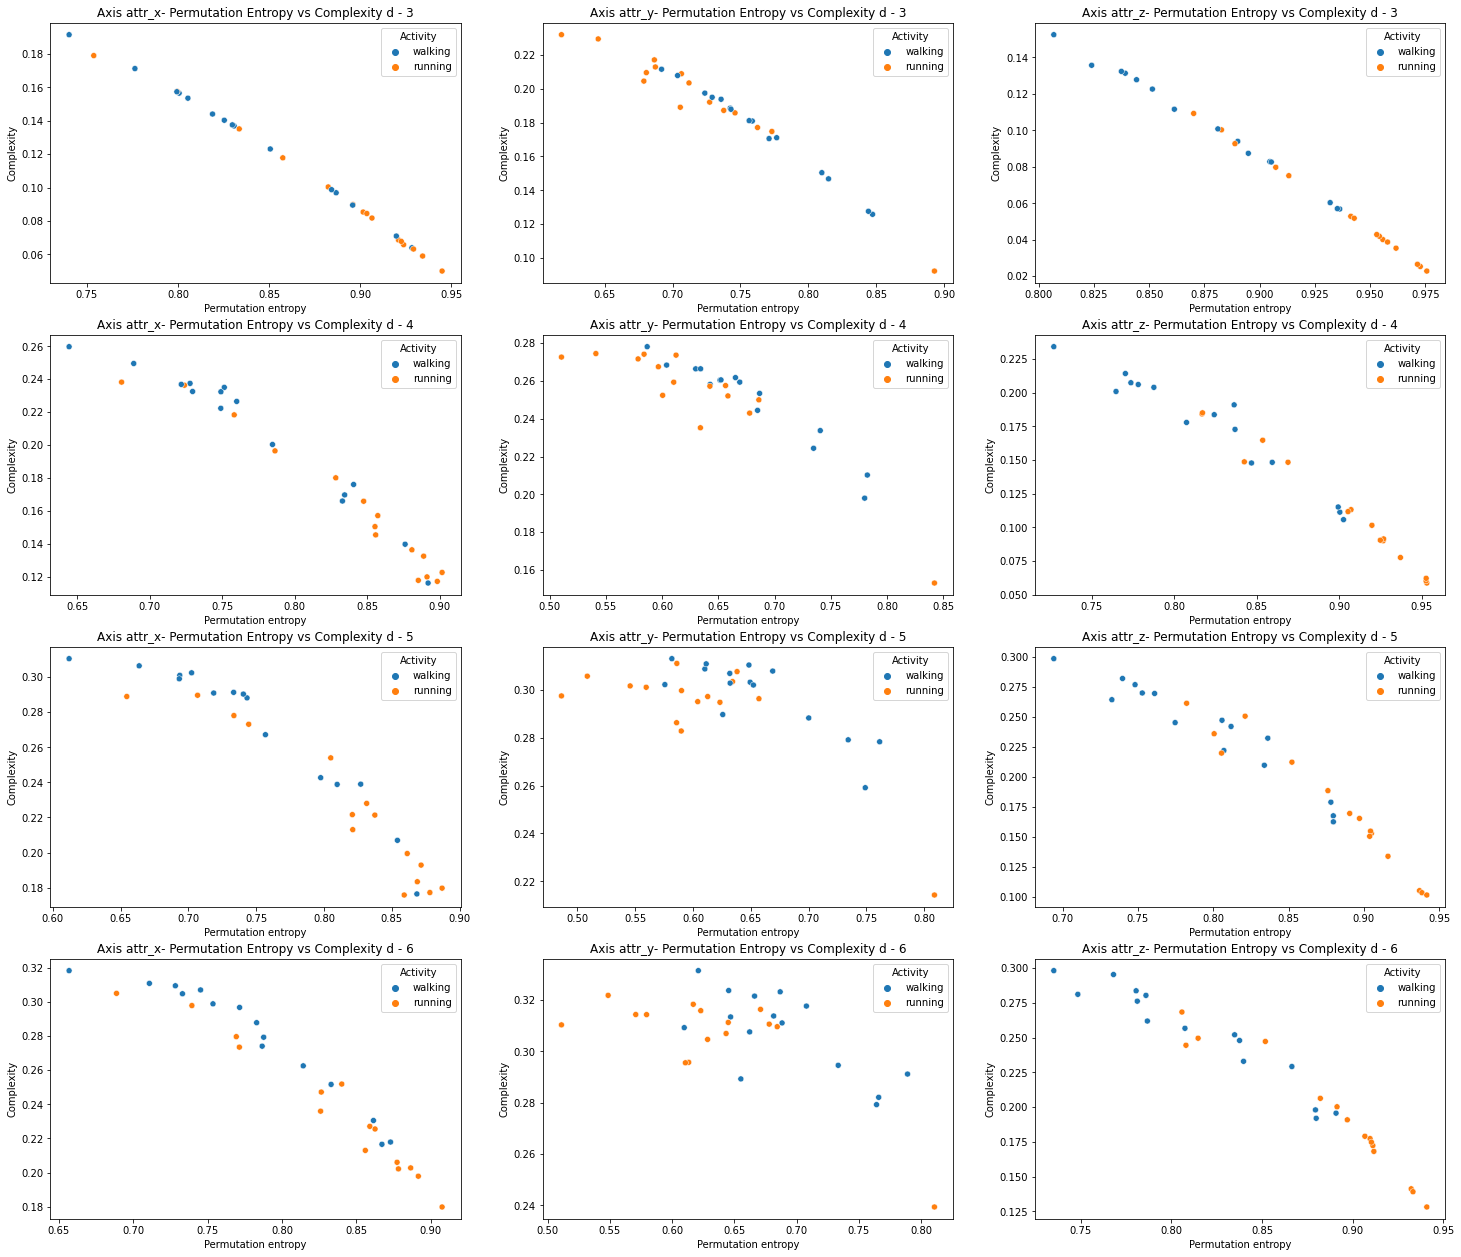

In [20]:
#BLOCK FOR PLOTTING WALKING AND RUNNING ACTIVITY BASED ON PERMUTATION ENTROPY VS COMPLEXITY
f, axes = plt.subplots(4, 3 ,  figsize=(25, 22)) #PLOTTING GRAPH
embeded_dms = [3,4,5,6] #GIVEN EMBEDED DIMENSIONS
for d in range(4): #FOR LOOP TO RUN DIMENSIONS
  for a in ['attr_x', 'attr_y', 'attr_z']: #FOR LOOP TO RUN AXIS
    plot_title= 'Axis ' + str(a)+ '- ' + 'Permutation Entropy vs Complexity'+ ' d - ' + str(embeded_dms[d]) #TITLE LINE
    plot_table2 = Output_Frame2[(Output_Frame2['Accelerometer axis'] == a) & ((Output_Frame2['Activity']=='walking') | (Output_Frame2['Activity']=='running')) & (Output_Frame2['Signal length'] == 4096) & (Output_Frame2['Delay'] == 1) & (Output_Frame2['Dimension'] == embeded_dms[d])]   
    if a == 'attr_x': #CHECKING IF AXIS IS X
      sns.scatterplot(data= plot_table2, x='Permutation entropy', y='Complexity', hue="Activity" , ax=axes[embeded_dms.index(embeded_dms[d]),0]).set_title(plot_title) #PLOTTING GRAPH FOR X AXIS
    elif a == 'attr_y': #CHECKING IF AXIS IS Y
      sns.scatterplot(data= plot_table2, x='Permutation entropy', y='Complexity', hue='Activity', ax=axes[embeded_dms.index(embeded_dms[d]),1]).set_title(plot_title) #PLOTTING FOR Y AXIS
    elif a == 'attr_z': #CHECKING IF AXIS IS Z
      sns.scatterplot(data= plot_table2, x='Permutation entropy', y='Complexity', hue='Activity', ax=axes[embeded_dms.index(embeded_dms[d]),2]).set_title(plot_title) #PLOTTING FOR Z AXIS


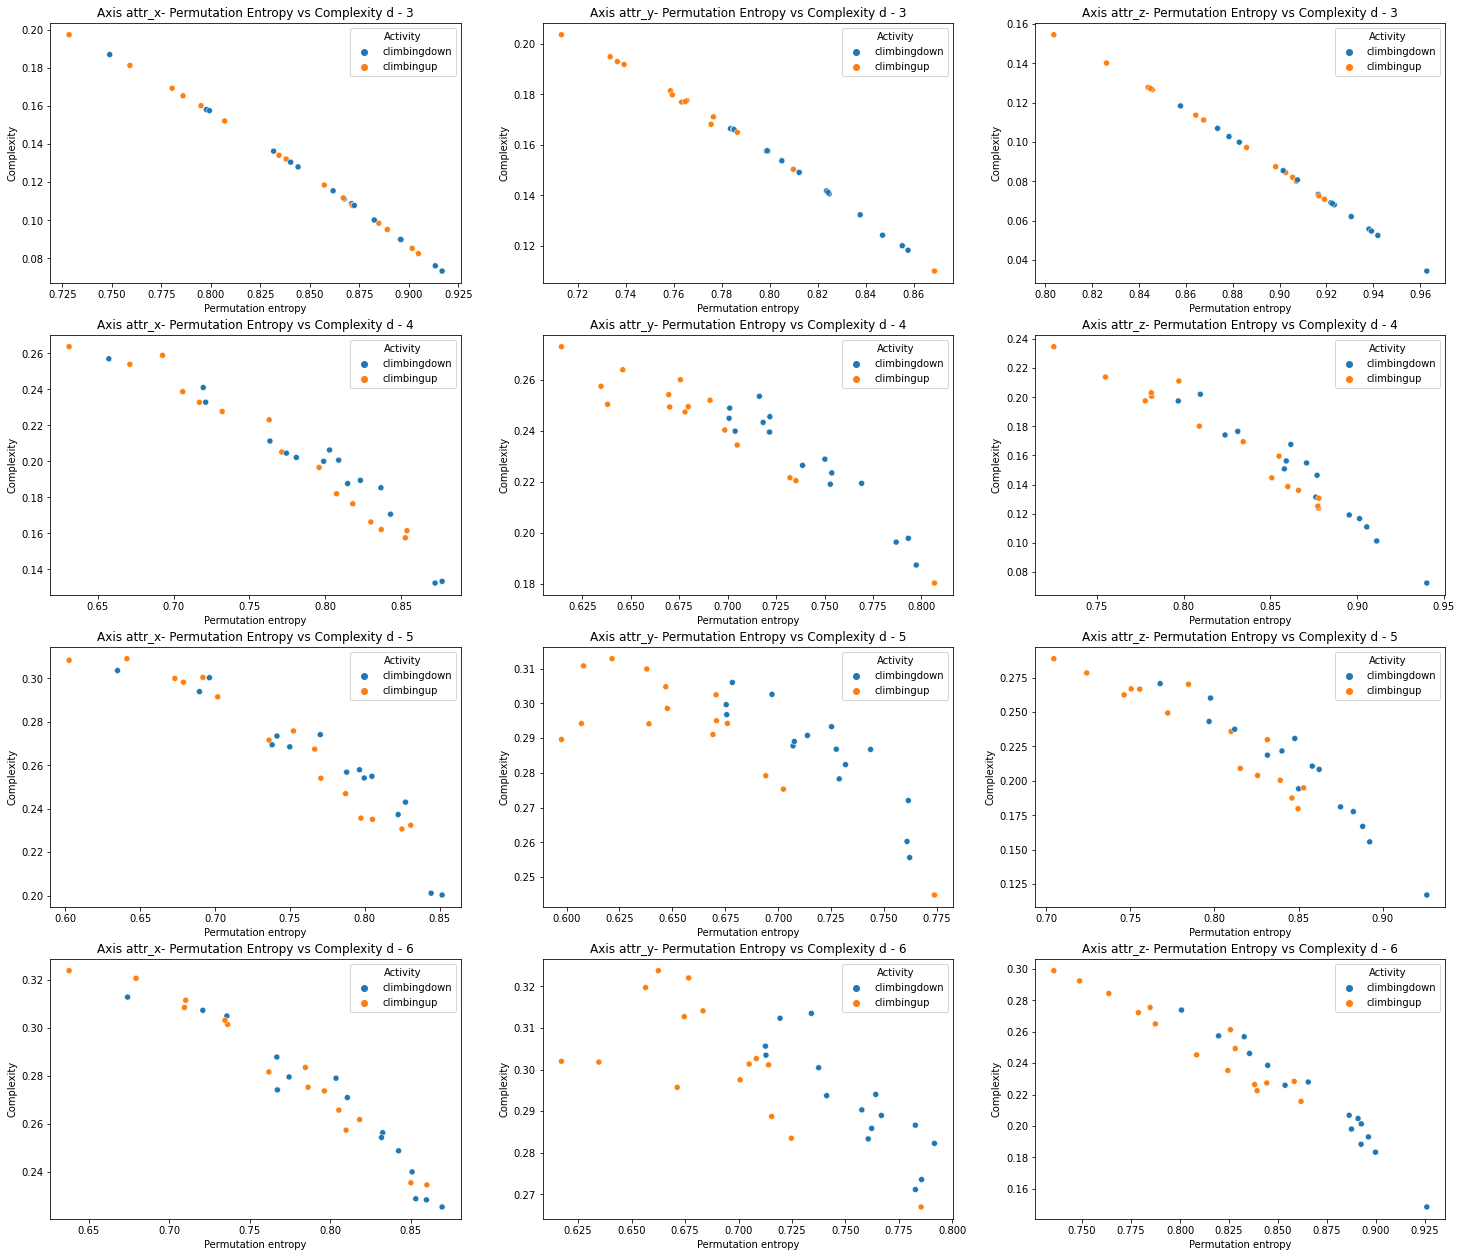

In [21]:
#BLOCK FOR PLOTTING CLIMBINGUP AND CLIMBING DOWN ACTIVITY BASED ON PERMUTATION ENTROPY VS COMPLEXITY
f, axes = plt.subplots(4, 3 ,  figsize=(25, 22))  #PLOTTING GRAPH
embeded_dms = [3,4,5,6] #GIVEN EMBEDED DIMENSIONS
for d in range(4): #FOR LOOP TO RUN DIMENSIONS
  for a in ['attr_x', 'attr_y', 'attr_z']: #FOR LOOP TO RUN AXIS
    plot_title= 'Axis ' + str(a)+ '- ' + 'Permutation Entropy vs Complexity'+ ' d - ' + str(embeded_dms[d])
    plot_table2 = Output_Frame2[(Output_Frame2['Accelerometer axis'] == a) & ((Output_Frame2['Activity']=='climbingup') | (Output_Frame2['Activity']=='climbingdown')) & (Output_Frame2['Signal length'] == 4096) & (Output_Frame2['Delay'] == 1) & (Output_Frame2['Dimension'] == embeded_dms[d])]     
    if a == 'attr_x': #CHECKING IF AXIS IS X
      sns.scatterplot(data= plot_table2, x='Permutation entropy', y='Complexity', hue="Activity" , ax=axes[embeded_dms.index(embeded_dms[d]),0]).set_title(plot_title) #PLOTTING GRAPH FOR X AXIS
    elif a == 'attr_y': #CHECKING IF AXIS IS Y
      sns.scatterplot(data= plot_table2, x='Permutation entropy', y='Complexity', hue='Activity', ax=axes[embeded_dms.index(embeded_dms[d]),1]).set_title(plot_title) #PLOTTING FOR Y AXIS
    elif a == 'attr_z': #CHECKING IF AXIS IS Z
      sns.scatterplot(data= plot_table2, x='Permutation entropy', y='Complexity', hue='Activity', ax=axes[embeded_dms.index(embeded_dms[d]),2]).set_title(plot_title) #PLOTTING FOR Z AXIS

## BODY PART : HEAD

In [22]:
#CREATING AN OUTPUT FRAME FOR EAD POSITION DATA
column_names = ['Subject', 'Accelerometer axis', 'Signal length', 'Dimension' , 'Delay' ,'Permutation entropy' , 'Complexity',  'Activity']
Output_Frameh2 = pd.DataFrame(columns = column_names)

In [23]:
for s in subjects:#FOR LOOP TO READ SUBJECTS 1-15
  for act in activity: #FOR LOOP TO READ ACTIVITIES, 4 DIFFERENT ACTIVITIES
    filepath = fp_init + s + '/acc_' + act + '_head.csv' #READING THE DATAFILE OF HEAD PARTICULARLY FROM THE GIVEN PATH
    file = pd.read_csv(filepath) #STORING IT TO FILE VARIABLE
    for signal_length in [1024, 2048, 4096]: #FOR LOOP TO READ SIGNAL LENGTH VALUES 
      for dimension in [3, 4, 5, 6]: #FOR LOOP TO READ EMBEDED DIMENSIONS VALUE
        for delay in [1, 2, 3]: #FOR LOOP TO READ EMBEDED DELAY
          for attr in attributes: #FOR LOOP TO RAD AXIS
            op_result = ordinal_patterns(file[attr][0:signal_length], dimension, delay)
            perm_ent = p_entropy(op_result) #CALCULATING ENTROPY
            comp= complexity(op_result) #CALCULATING COMPLEXITY
            df_temp3 = {'Subject':s, 'Accelerometer axis':attr, 'Signal length': signal_length, 'Dimension': dimension,'Delay': delay, 'Permutation entropy':perm_ent, 'Complexity': comp, 'Activity':act}
            Output_Frameh2 = Output_Frame2.append(df_temp3, ignore_index = True) #STORING THE VALUE TO OUPUT FRAME
Output_Frameh2 #FINAL FRAME DISPLAY ACCORDING TO TEST CASE

,Subject,Accelerometer axis,Signal length,Dimension,Delay,Permutation entropy,Complexity,Activity
0,subject_1,attr_x,1024,3,1,0.863880,0.113789,climbingdown
1,subject_1,attr_y,1024,3,1,0.871156,0.109263,climbingdown
2,subject_1,attr_z,1024,3,1,0.866439,0.112078,climbingdown
3,subject_1,attr_x,1024,3,2,0.960872,0.036053,climbingdown
4,subject_1,attr_y,1024,3,2,0.961124,0.035987,climbingdown
...,...,...,...,...,...,...,...,...
6476,subject_15,attr_z,4096,6,2,0.926582,0.148923,running
6477,subject_15,attr_x,4096,6,3,0.867050,0.229051,running
6478,subject_15,attr_y,4096,6,3,0.732782,0.352555,running
6479,subject_15,attr_z,4096,6,3,0.906520,0.174448,running


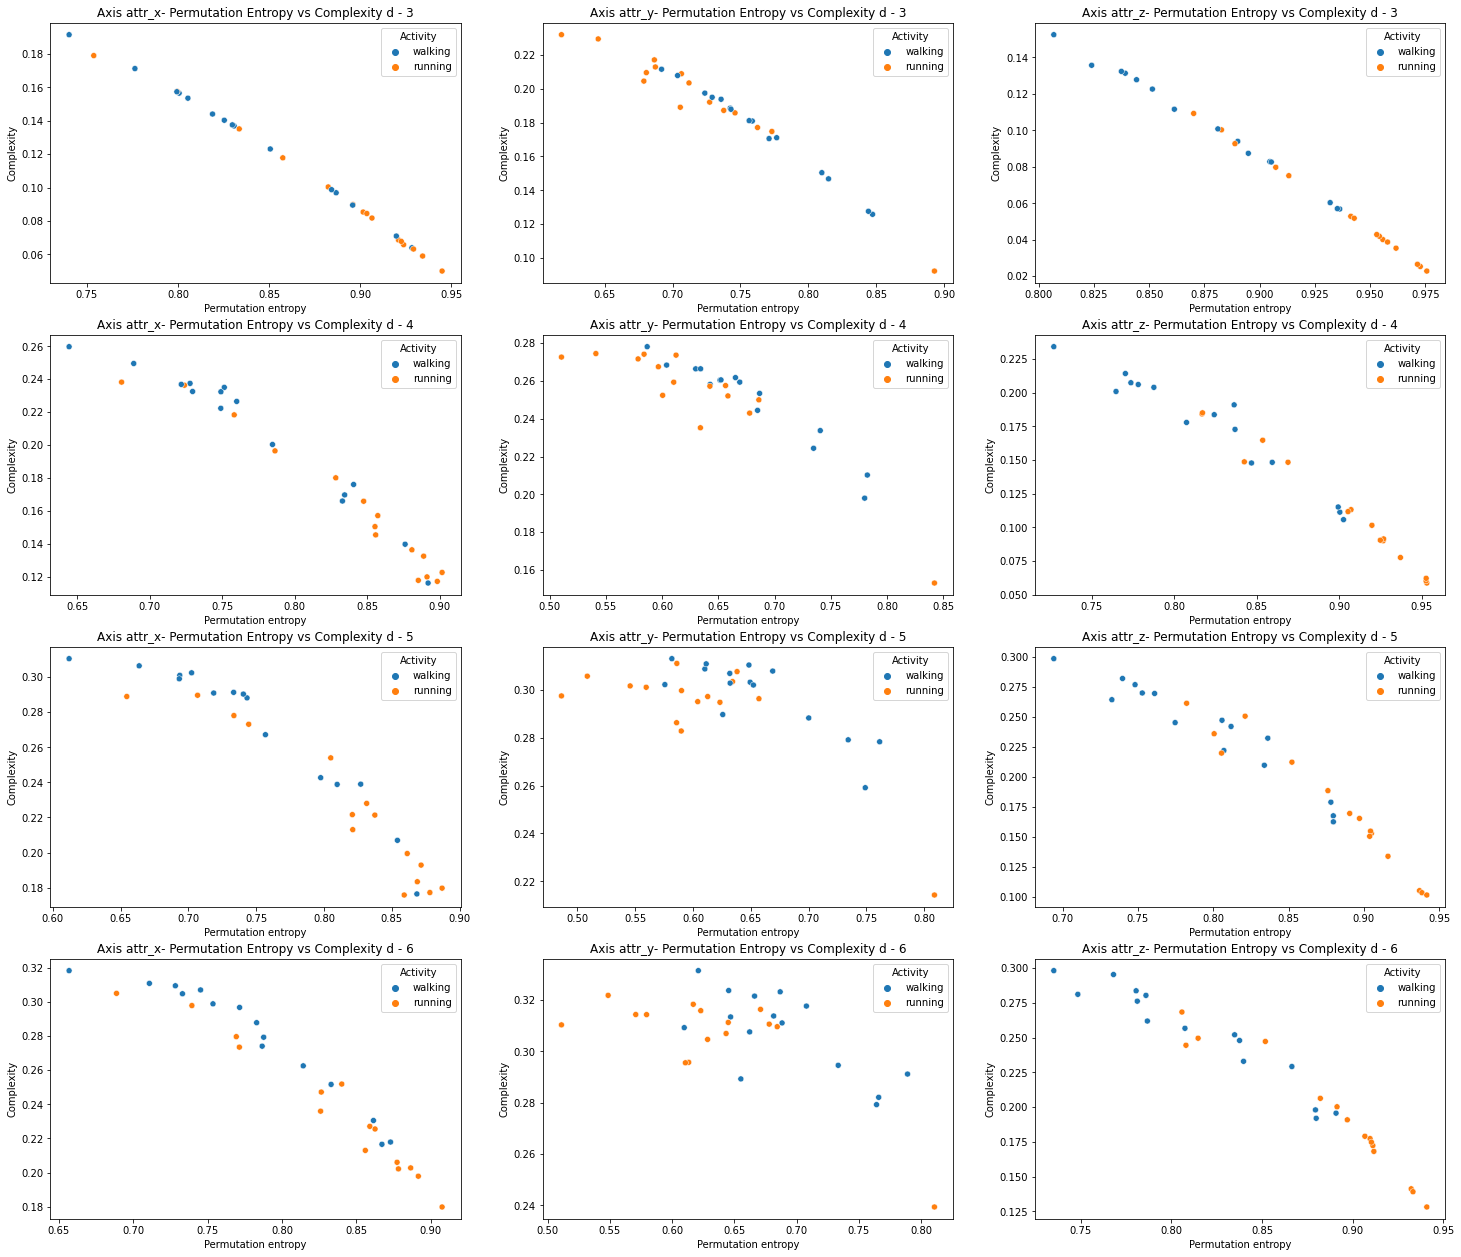

In [24]:
#BLOCK FOR PLOTTING WALKING AND RUNNING ACTIVITY BASED ON PERMUTATION ENTROPY VS COMPLEXITY
f, axes = plt.subplots(4, 3 ,  figsize=(25, 22)) #PLOTTING GRAPH
embeded_dms = [3,4,5,6] #GIVEN EMBEDED DIMENSIONS
for d in range(4): #FOR LOOP TO RUN DIMENSIONS
  for a in ['attr_x', 'attr_y', 'attr_z']: #FOR LOOP TO RUN AXIS
    plot_title= 'Axis ' + str(a)+ '- ' + 'Permutation Entropy vs Complexity'+ ' d - ' + str(embeded_dms[d]) #TITLE LINE
    plot_table3 = Output_Frameh2[(Output_Frameh2['Accelerometer axis'] == a) & ((Output_Frameh2['Activity']=='walking') | (Output_Frameh2['Activity']=='running')) & (Output_Frameh2['Signal length'] == 4096) & (Output_Frameh2['Delay'] == 1) & (Output_Frameh2['Dimension'] == embeded_dms[d])]   
    if a == 'attr_x': #CHECKING IF AXIS IS X
      sns.scatterplot(data= plot_table3, x='Permutation entropy', y='Complexity', hue="Activity" , ax=axes[embeded_dms.index(embeded_dms[d]),0]).set_title(plot_title) #PLOTTING GRAPH FOR X AXIS
    elif a == 'attr_y': #CHECKING IF AXIS IS Y
      sns.scatterplot(data= plot_table3, x='Permutation entropy', y='Complexity', hue='Activity', ax=axes[embeded_dms.index(embeded_dms[d]),1]).set_title(plot_title) #PLOTTING FOR Y AXIS
    elif a == 'attr_z': #CHECKING IF AXIS IS Z
      sns.scatterplot(data= plot_table3, x='Permutation entropy', y='Complexity', hue='Activity', ax=axes[embeded_dms.index(embeded_dms[d]),2]).set_title(plot_title) #PLOTTING FOR Z AXIS


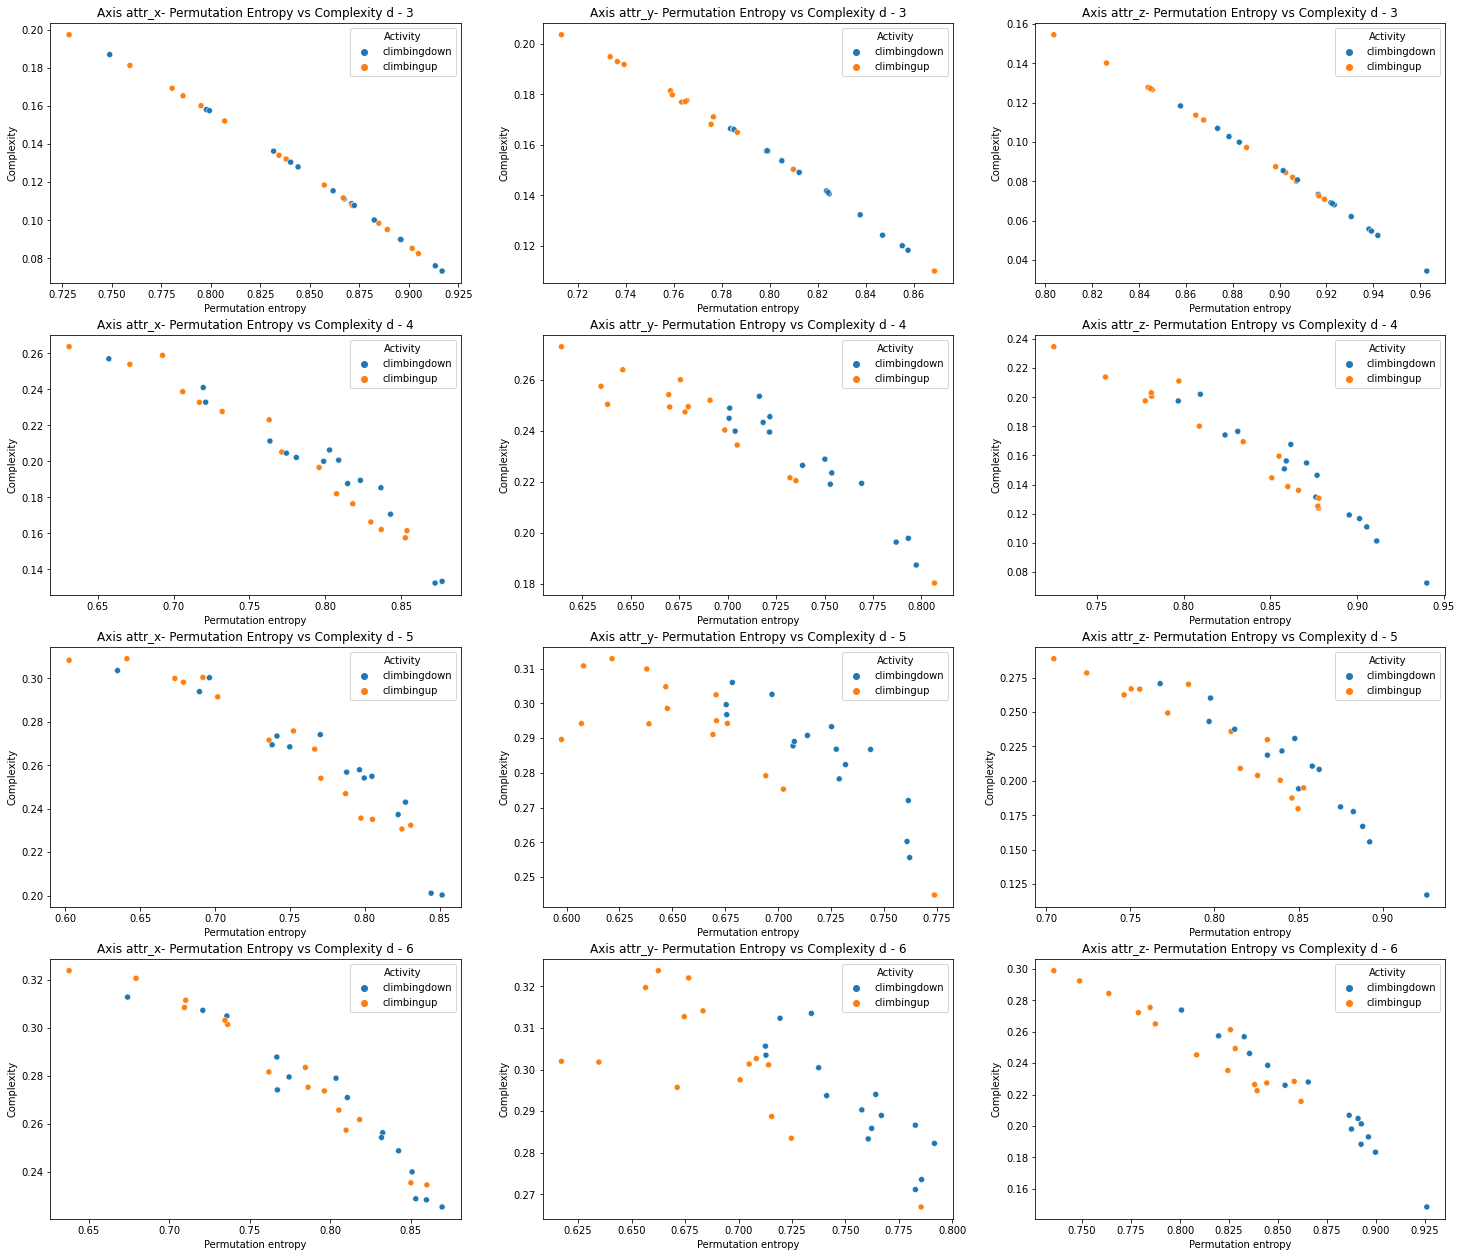

In [25]:
#BLOCK FOR PLOTTING CLIMBINGUP AND CLIMBING DOWN ACTIVITY BASED ON PERMUTATION ENTROPY VS COMPLEXITY
f, axes = plt.subplots(4, 3 ,  figsize=(25, 22))  #PLOTTING GRAPH
embeded_dms = [3,4,5,6] #GIVEN EMBEDED DIMENSIONS
for d in range(4): #FOR LOOP TO RUN DIMENSIONS
  for a in ['attr_x', 'attr_y', 'attr_z']: #FOR LOOP TO RUN AXIS
    plot_title= 'Axis ' + str(a)+ '- ' + 'Permutation Entropy vs Complexity'+ ' d - ' + str(embeded_dms[d])
    plot_table3 = Output_Frameh2[(Output_Frameh2['Accelerometer axis'] == a) & ((Output_Frameh2['Activity']=='climbingup') | (Output_Frameh2['Activity']=='climbingdown')) & (Output_Frameh2['Signal length'] == 4096) & (Output_Frameh2['Delay'] == 1) & (Output_Frameh2['Dimension'] == embeded_dms[d])]     
    if a == 'attr_x': #CHECKING IF AXIS IS X
      sns.scatterplot(data= plot_table3, x='Permutation entropy', y='Complexity', hue="Activity" , ax=axes[embeded_dms.index(embeded_dms[d]),0]).set_title(plot_title) #PLOTTING GRAPH FOR X AXIS
    elif a == 'attr_y': #CHECKING IF AXIS IS Y
      sns.scatterplot(data= plot_table3, x='Permutation entropy', y='Complexity', hue='Activity', ax=axes[embeded_dms.index(embeded_dms[d]),1]).set_title(plot_title) #PLOTTING FOR Y AXIS
    elif a == 'attr_z': #CHECKING IF AXIS IS Z
      sns.scatterplot(data= plot_table3, x='Permutation entropy', y='Complexity', hue='Activity', ax=axes[embeded_dms.index(embeded_dms[d]),2]).set_title(plot_title) #PLOTTING FOR Z AXIS